In [55]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm

In [56]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

## Generating graph

In [57]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
    return G

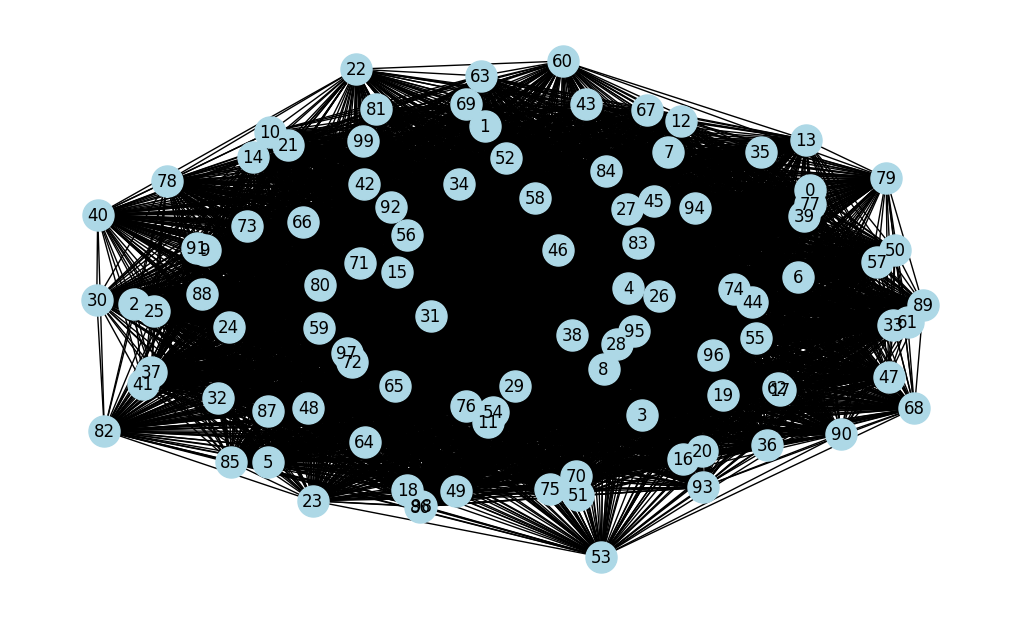

In [58]:
G = gnp_random_connected_graph(100, 1, False, True)

# For Task 2

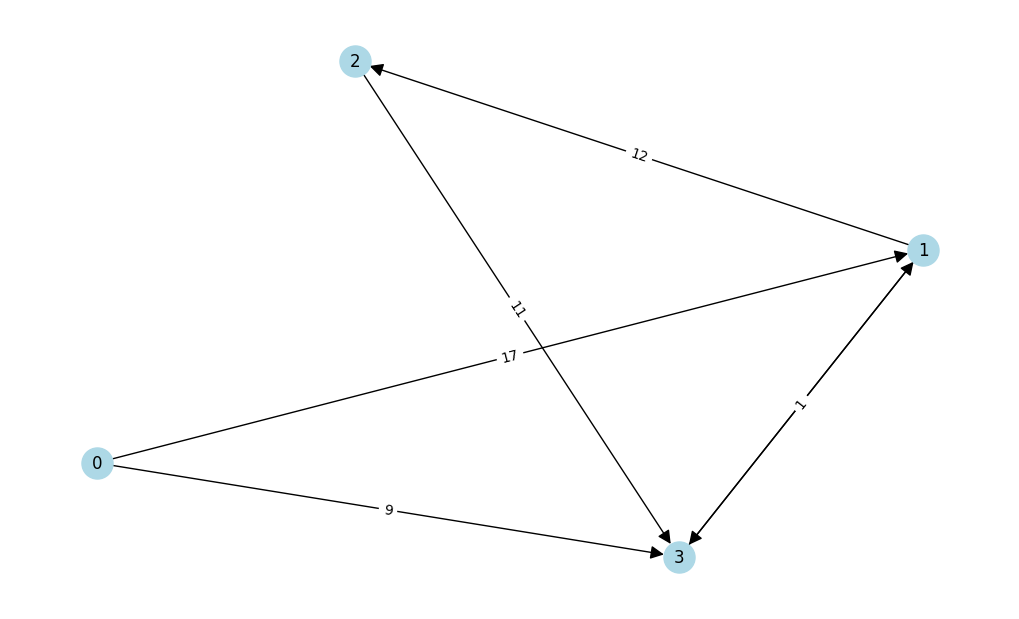

In [59]:
G = gnp_random_connected_graph(4, 0.5, True, True)

## Bellman-Ford algorithm

In [60]:
from networkx.algorithms import bellman_ford_predecessor_and_distance

Distance to 0: 0
Distance to 3: -1
Distance to 1: 6
Distance to 2: 3


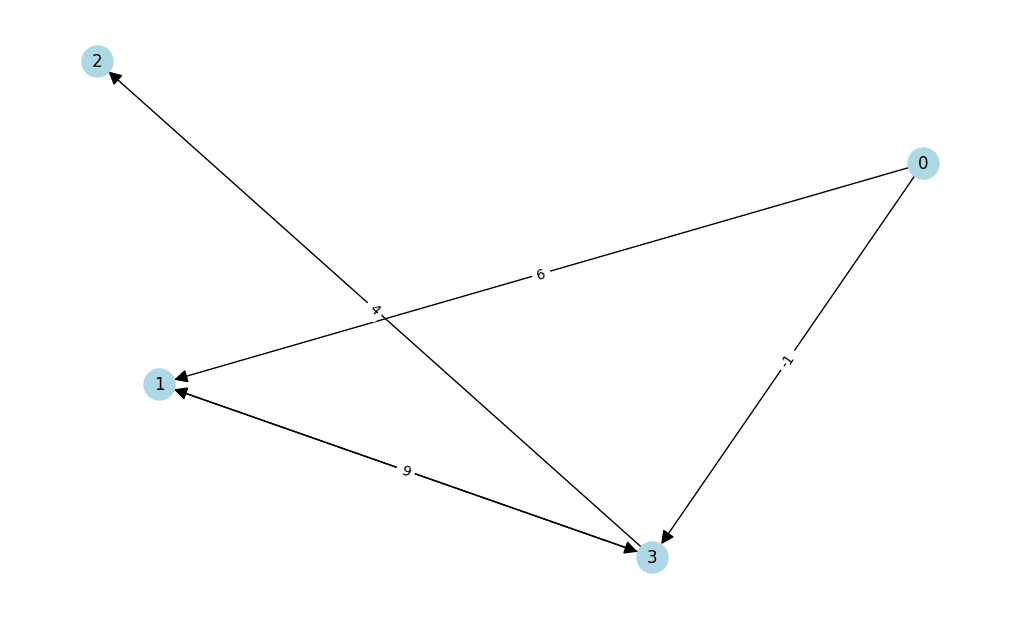

In [61]:

G = gnp_random_connected_graph(4, 0.5, True, True)
# pred is a dictionary of predecessors, dist is a dictionary of distances
try:
    pred, dist = bellman_ford_predecessor_and_distance(G, 0)
    for k, v in dist.items():
        print(f"Distance to {k}:", v)
except:
    print("Negative cycle detected")

({0: [], 1: [0], 2: [3], 3: [1]}, {0: 0, 1: 0, 2: -2, 3: -2})


({0: [], 1: [0], 2: [3], 3: [1]}, {0: 0, 1: 0, 2: -2, 3: -2})

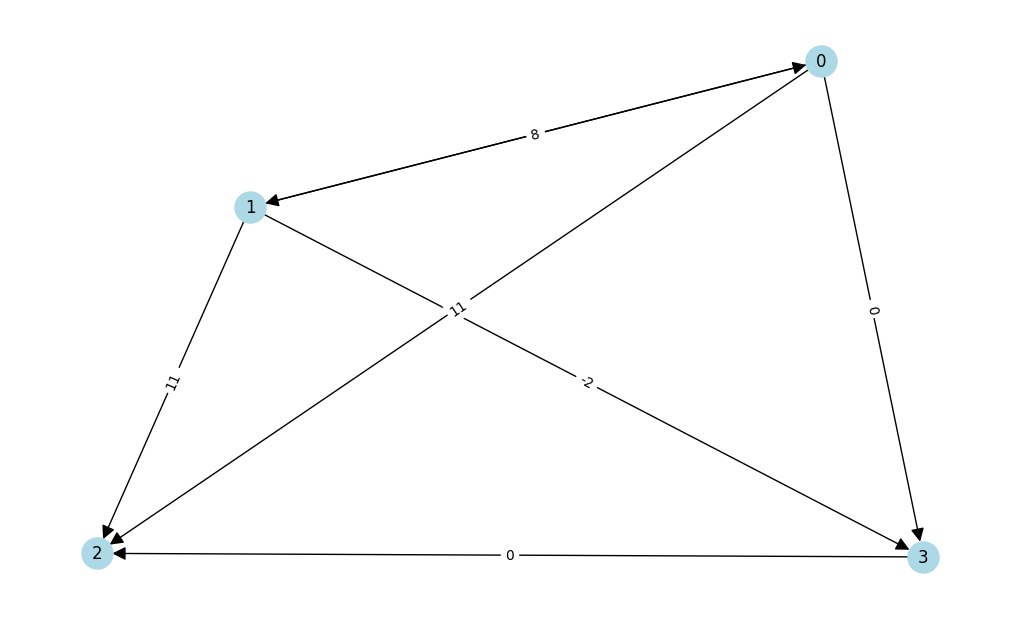

In [62]:
def bellman_ford(G,start=0):
    distances=[float('inf') for _ in range(len(G.nodes))]
    distances[start]=0
    pred=[[] for _ in range(len(G.nodes))]
    for _ in range(len(G.nodes)-1):
        for u,v,w in G.edges(data=True):
            if distances[u]+w['weight']<distances[v]:
                distances[v]=distances[u]+w['weight']
                pred[v]=[u]
            elif distances[u]+w['weight']==distances[v]:
                if u not in pred[v]:
                    pred[v].append(u)
    for u,v,w in G.edges(data=True):
        if distances[u]+w['weight']<distances[v]:
            return 'Negative cycle detected', None
    return {i:v for i,v in enumerate(pred)},{i:v for i,v in enumerate(distances)}
    
G = gnp_random_connected_graph(4, 0.5, True, True)
print(bellman_ford_predecessor_and_distance(G,0))
bellman_ford(G,0)


## Floyd-Warshall algorithm

In [63]:
from networkx.algorithms import floyd_warshall_predecessor_and_distance

0 4 17
0 1 12
0 2 9
1 3 6
1 2 8
2 3 14
3 4 -2
Graph with 5 nodes and 7 edges


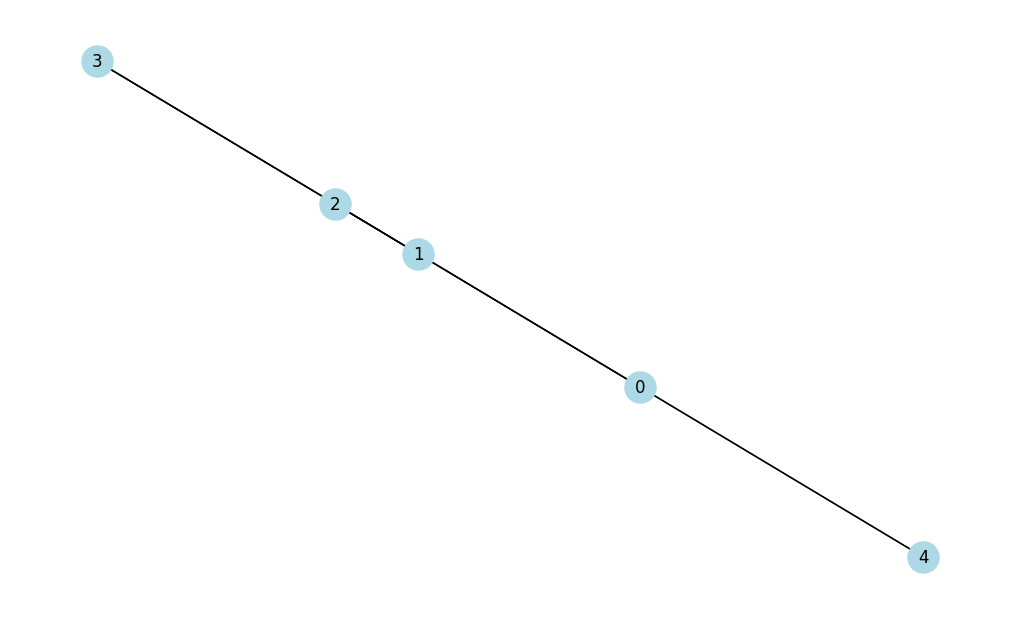

In [64]:
G = gnp_random_connected_graph(5, 0.5, False, True)
for e, v, w in G.edges(data=True):
    print(e, v, w['weight'])
print(G)

In [65]:
# pred is a dictionary of predecessors, dist is a dictionary of distances dictionaries
try:
    pred, dist = floyd_warshall_predecessor_and_distance(G) 
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))
except:
    print("Negative cycle detected")

Distances with 0 source: {0: 0, 4: 12, 1: 12, 2: 9, 3: 14}
Distances with 1 source: {1: 0, 0: 12, 3: 2, 2: 8, 4: 0}
Distances with 2 source: {2: 0, 0: 9, 1: 8, 3: 10, 4: 8}
Distances with 3 source: {3: -4, 1: 2, 2: 10, 4: -6, 0: 14}
Distances with 4 source: {4: -8, 0: 12, 3: -6, 1: 0, 2: 8}


In [66]:
def create_matrix(graph):
    is_directed = isinstance(graph, nx.DiGraph)
    num_nodes = len(graph.nodes)
    matrix = [[float('inf')] * num_nodes for _ in range(num_nodes)]

    for u, v, w in graph.edges(data=True):
        matrix[u][v] = w['weight']
        if not is_directed:
            matrix[v][u] = w['weight']

    for i in range(num_nodes):
        matrix[i][i] = 0

    return matrix

def floyd_warshall(graph):
    matrix = create_matrix(graph)
    num_nodes = len(matrix)

    for k in range(num_nodes):
        for i in range(num_nodes):
            for j in range(num_nodes):
                if matrix[i][k] + matrix[k][j] < matrix[i][j]:
                    matrix[i][j] = matrix[i][k] + matrix[k][j]

    for i in range(num_nodes):
        if matrix[i][i] < 0:
            return "Negative cycle occurred"
    res_matrix={}
    for i in range(num_nodes):
        res_matrix[i]={}
        for k in range(num_nodes):
            res_matrix[i][k]=matrix[i][k]
    return res_matrix

In [67]:
floyd_warshall(G)

'Negative cycle occurred'

## Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [68]:
import time
from tqdm import tqdm

In [80]:
NUM_OF_ITERATIONS=100
def count_time(function, size):
    time_taken = 0
    for _ in tqdm(range(NUM_OF_ITERATIONS)):

        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(size, 0.4, False)

        start = time.time()
        try:
            function(G, 0)
        except:
            pass
        end = time.time()

        time_taken += end - start

    return time_taken / NUM_OF_ITERATIONS

Bellman Ford

100%|██████████| 100/100 [03:14<00:00,  1.94s/it]


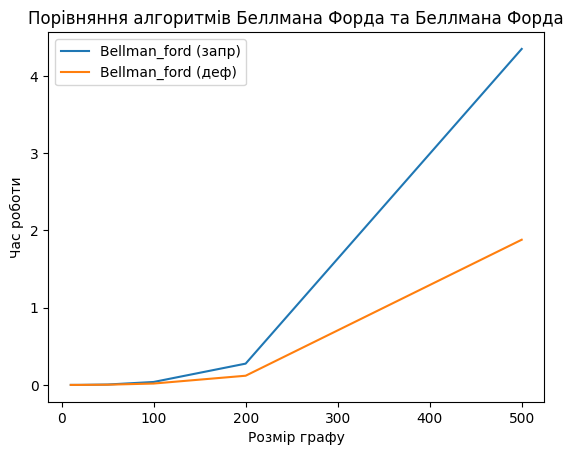

In [81]:
graph_sizes = [10, 20, 50, 100, 200, 500]
bellman_ford_mine = [count_time(bellman_ford, size) for size in graph_sizes]  # Приклад часу роботи для алгоритму Крускала (запрограмованого)
bellman_ford_def = [count_time(bellman_ford_predecessor_and_distance, size) for size in graph_sizes]  # Приклад часу роботи для алгоритму Крускала (дефолтного)

plt.plot(graph_sizes, bellman_ford_mine, label='Bellman_ford (запр)')
plt.plot(graph_sizes, bellman_ford_def, label='Bellman_ford (деф)')
plt.xlabel('Розмір графу')
plt.ylabel('Час роботи')
plt.title('Порівняння алгоритмів Беллмана Форда та Беллмана Форда')
plt.legend()
plt.show()

Алгоритм працює чудово у всіх випадках окрім надто великих, але тоді вже мариці надто великі і важко справитись навіть вбудованому алгоритмові. Погіршення можуть виникати через не повністю оптимізований код, але ми не знаємо як його покращити.

Floyd Warshall

Зробили допоміжні функції, які створюють матрицю ваг. Потім код брав кожен рядок і відповідний стовпець і шукав нові значення за допомогою додавання значень на цих рядках і стовпцях, так робив доки не завершувалась матриця, потім перетворював в словник і повертав. Якщо якась вершина має до себе шлях менше 1, то код повертає "Negative cycle occurred".


100%|██████████| 100/100 [00:00<00:00, 7378.49it/s]


100%|██████████| 100/100 [01:32<00:00,  1.08it/s]


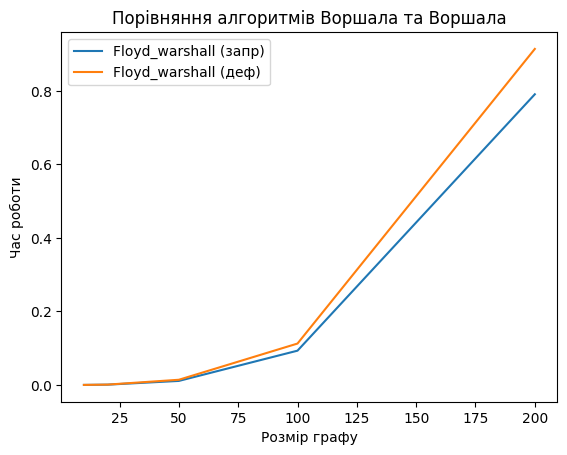

In [ ]:
graph_sizes = [10, 20, 50, 100, 200]
warshall_mine = [count_time(floyd_warshall, size) for size in graph_sizes]  # Приклад часу роботи для алгоритму Крускала (запрограмованого)
warshall_def = [count_time(floyd_warshall_predecessor_and_distance, size) for size in graph_sizes]  # Приклад часу роботи для алгоритму Крускала (дефолтного)

plt.plot(graph_sizes, warshall_mine, label='Floyd_warshall (запр)')
plt.plot(graph_sizes, warshall_def, label='Floyd_warshall (деф)')
plt.xlabel('Розмір графу')
plt.ylabel('Час роботи')
plt.title('Порівняння алгоритмів Воршала та Воршала')
plt.legend()
plt.show()

З кожним разом алгоритм все сповільнювався і сповільнувався через розмір матриці, тож ми мусили зменшити максимальний розмір до 200, адже потім на виконання одного алгоритму йшло 15-20 секунд. Це може бути повʼязано з створенням матриці, та доволі примітивним обходом її, але наші алгоритми доволі схожі, похибка мінімальна